# $Ceol$ $Rince$ $na$ $hÉireann$
## The Ceol Rince na hÉireann (CRÉ) corpus contains 1,224 Irish traditional dance tunes, each represented as a monophonic MIDI file.

Originally collected and published by [Breandán Breathnach][2] (1912-1985); transcribed to ABC Notation by [Bill Black][1]; corpus cleaned, annotated and converted to MIDI by Danny Diamond for Polifonia deliverable D3.1: Software Tools for Pattern Extraction.

This notebook explores the corpus, generating and visualizing some basic statistics on the content, including:
* Number of melodies in corpus.
* Distribution of key signature and time signature values across the corpus.
* Number of note events and number of bars per melody across the corpus.

## Prerequisites:

In <basepath>/MIDI we should have a corpus of folk tunes in MIDI format. By default basepath is ./corpus/. If the corpus is elsewhere, change basepath below. We will be writing outputs to subdirectories of basepath.

Install the libraries Matplotlib and Music21:

`pip install matplotlab music21`

[1]: http://www.capeirish.com/webabc
[2]: https://en.wikipedia.org/wiki/Breandán_Breathnach

In [25]:
import os.path
import sys
sys.path.append("../setup_corpus")

import music21
import os

Setup paths:

In [26]:
basepath = "./"
inpath = basepath + "/MIDI"
roots_path = basepath + "/roots.csv"

for path in [basepath, inpath, roots_path]:
    assert os.path.exists(path)

Import local corpus setup / analysis tools:

In [49]:
from setup_corpus.corpus_processing_tools import Music21Corpus, MusicDataCorpus

Instantiate Music21Corpus class (this will return the total number of MIDI files in CRÉ corpus, and list their titles):

In [50]:
cre_corpus = Music21Corpus(inpath)

Input corpus contains 1224 melodies:

Tureengarbh Jig, The
Young And Stylish
Fun at the Fair
Buckley the Fiddler  (reel)
Tommy Coen's Reel
Lynch's Hornpipe
Tuttle's Reel
Patrick O'Connor's  (polka)
Patsy Tuohey's (reel)
Beggarman's Reel, The
Up and About In the Morning  (slide)
My Love Between Two Roses (reel)
Ladies Step Up to Tea!
Old Pigeon on the Gate, The
Curragh Races (reel), The
Mangan's Fancy (reel)
McDonagh's Reel 1
One of Tommy's  (hornpipe)
Listowel Fiddler  (slide), The
John Flynn's Jig
Callan Lasses (reel), The
Knocknaboul Reel, The
Jackson's Post-Chaise
Father Skehan's Jig
Tom Connors' Jig
Sailor's Bonnet (reel), The
Pomeroy Fiddler  (reel), The
Her Golden Hair Was Curling Down
Frog in the Puddle , The
Tap the Barrel (reel)
Trip to Durrow (reel), The
Humors of Derrycros(s)ane, The
Nine Mile House  (reel)
Duke of Leinster Hornpipe, The
Mason's Apron (reel), The
Pat O'Beirne's Favorite
Gooseberry Bush (reel), The
Carty's Reel
Brother Gildas' Jig
Hunter's Purse (reel), The
L

Read all tunes from MIDI to the Music21 Python library $stream$ format for analysis:

In [30]:
cre_corpus.read_midi_files_to_streams();


1224 melodies successfully read to Music21 stream representation.


Extract root note for each tune in corpus:

In [32]:
roots = [tune.keySignature.tonic.name.upper() for tune in cre_corpus.melodies if tune.keySignature]
tune_names_roots = dict(zip(cre_corpus.titles, [str(note) for note in roots]))
for name, root in list(tune_names_roots.items())[:10]:
    print(f"{name}: {root}")
print("...")

Tureengarbh Jig, The: D
Young And Stylish: G
Fun at the Fair: G
Buckley the Fiddler  (reel): G
Tommy Coen's Reel: G
Lynch's Hornpipe: D
Tuttle's Reel: D
Patrick O'Connor's  (polka): A
Patsy Tuohey's (reel): E
Beggarman's Reel, The: E
...


Count and print occurrences of root notes across the corpus as percentages:

In [33]:
from collections import Counter
roots_histogram = dict(Counter(roots).most_common())
for root, count in roots_histogram.items():
    print(f"{root}: {round(count / 1224 * 100, 2)}%")

G: 40.52%
D: 34.97%
A: 12.99%
E: 9.48%
C: 1.63%
B: 0.33%
F: 0.08%


Display occurrences of each root note across the corpus in chart:

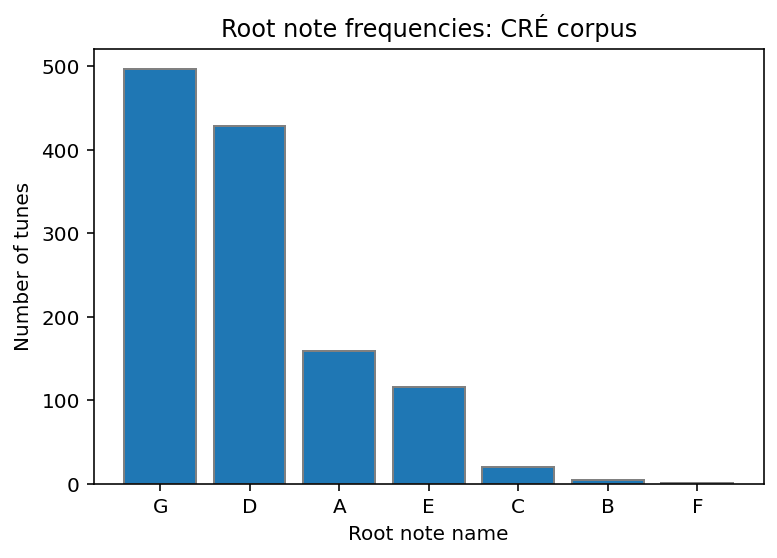

In [37]:
import matplotlib.pyplot as plt

plt.bar(list(roots_histogram.keys()), list(roots_histogram.values()), edgecolor='gray', linewidth=1)
plt.title('Root note frequencies: CRÉ corpus')
plt.xlabel('Root note name')
plt.ylabel('Number of tunes')
plt.show()

Extract time signature for each note in corpus:

In [34]:
time_sigs = [tune[music21.meter.TimeSignature][0].ratioString for tune in cre_corpus.melodies]
tune_names_time_sigs = dict(zip(cre_corpus.titles, [ts for ts in time_sigs]))
for name, ts in list(tune_names_time_sigs.items())[:10]:
    print(f"{name}: {ts}")
print("...")

Tureengarbh Jig, The: 6/8
Young And Stylish: 6/8
Fun at the Fair: 12/8
Buckley the Fiddler  (reel): 4/4
Tommy Coen's Reel: 4/4
Lynch's Hornpipe: 4/4
Tuttle's Reel: 4/4
Patrick O'Connor's  (polka): 2/4
Patsy Tuohey's (reel): 4/4
Beggarman's Reel, The: 4/4
...


Count and print occurrences of time signatures across the corpus as percentages:

In [35]:
time_sigs_histogram = dict(Counter(time_sigs).most_common())
for ts, count in time_sigs_histogram.items():
    print(f"{ts}: {round(count / 1224 * 100, 2)}%")

4/4: 59.64%
6/8: 21.49%
2/4: 6.86%
12/8: 6.54%
9/8: 4.25%
2/2: 1.14%
6/4: 0.08%


Display occurrences of each time signature across the corpus in chart:

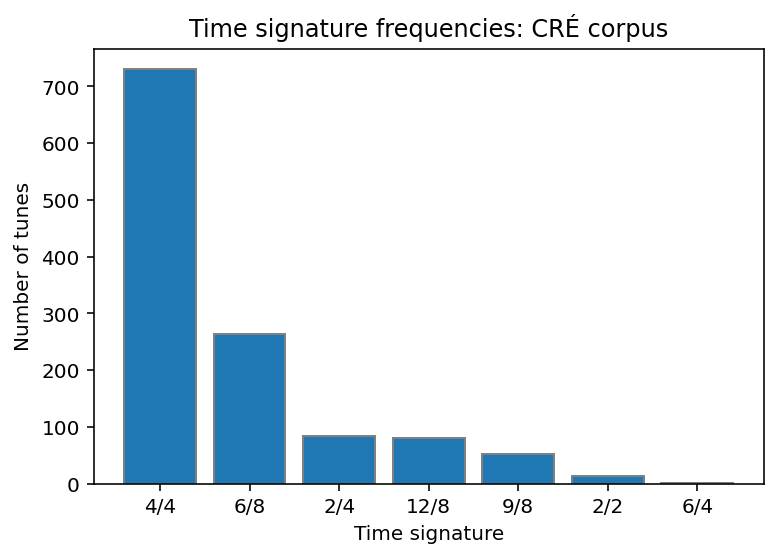

In [38]:
plt.bar(list(time_sigs_histogram.keys()), list(time_sigs_histogram.values()), edgecolor='gray', linewidth=1)
plt.title('Time signature frequencies: CRÉ corpus')
plt.xlabel('Time signature')
plt.ylabel('Number of tunes')
plt.show()

Convert to feature sequence format for further analysis:
<br>NOTE: This call takes c. 10 minutes to run.

In [39]:
cre_corpus.derive_feat_seqs();

1224 melodies successfully converted to feature sequence representation.



Print sample feature sequence data table for a single tune:

In [40]:
print(f"Primary feature sequence data for {cre_corpus.titles[0]}:")
print(cre_corpus.feat_seqs[0].head())

Primary feature sequence data for Tureengarbh Jig, The:
  MIDI_note  onset  duration velocity
0        71    0.0       0.5      105
1        69    0.5       0.5      105
2        71    1.0       0.5       80
3        73    1.5       0.5       80
4        74    2.0       0.5       95


Calculate distribution of tune lengths across the corpus, as measured by number of note events per tune.

In [41]:
tune_lengths = [len(tune) for tune in cre_corpus.feat_seqs]
tune_length_histogram = dict(Counter(tune_lengths).most_common())

Display tune length distribution as bar chart:

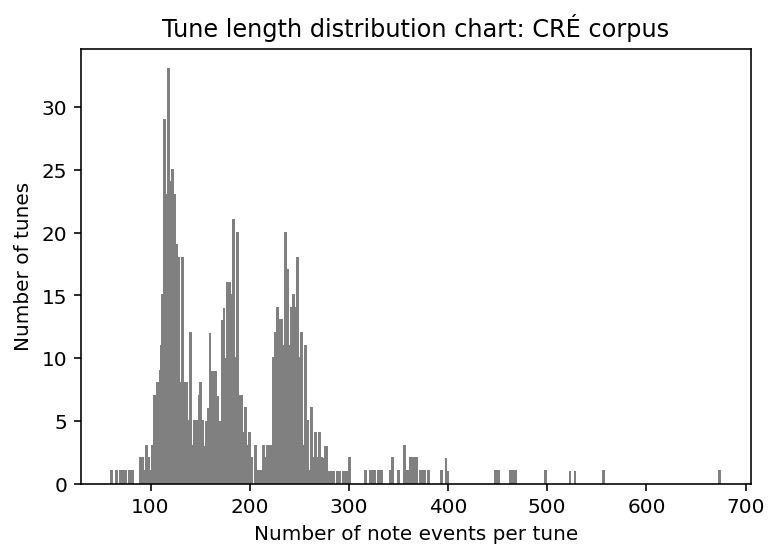

In [42]:
plt.bar(list(tune_length_histogram.keys()), list(tune_length_histogram.values()), edgecolor='gray', linewidth=1)

plt.title('Tune length distribution chart: CRÉ corpus')
plt.xlabel('Number of note events per tune')
plt.ylabel('Number of tunes')
plt.show()

Calculate distribution of number of bars per tune across the corpus:

In [43]:
import utils

filtered_seqs = [utils.filter_dataframe(seq, seq='velocity', threshold=100) for seq in cre_corpus.feat_seqs]
bar_counts = [len(seq) for seq in filtered_seqs]
bar_count_histogram = dict(Counter(bar_counts).most_common())

Display number of bars per tune as histogram:

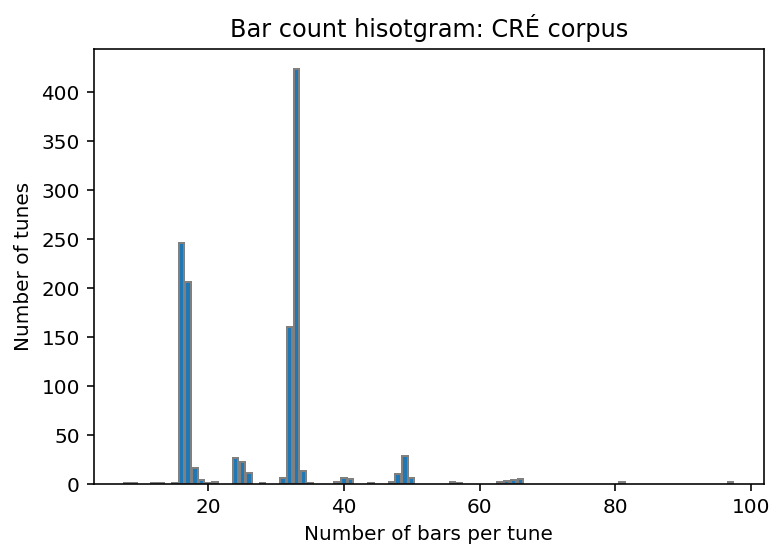

In [45]:
plt.bar(list(bar_count_histogram.keys()), list(bar_count_histogram.values()), edgecolor='gray', linewidth=1)

plt.title('Bar count hisotgram: CRÉ corpus')
plt.xlabel('Number of bars per tune')
plt.ylabel('Number of tunes')
plt.show()